# Thyroid Disease dataset

#### Dataset information

The original [thyroid disease](https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease) (ann-thyroid) dataset from [UCI machine learning repository](https://archive.ics.uci.edu/ml/) is a classification dataset, which is suited for training ANNs. It has 3772 training instances and 3428 testing instances. It has 15 categorical and 6 real attributes. The problem is to determine whether a patient referred to the clinic is hypothyroid. Therefore three classes are built: normal (not hypothyroid), hyperfunction and subnormal functioning. For outlier detection, 3772 training instances are used, with only 6 real attributes. The hyperfunction class is treated as outlier class and other two classes are inliers, because hyperfunction is a clear minority class.

#### Source (citation)

F. Keller, E. Muller, K. Bohm.“[HiCS: High-contrast subspaces for density-based outlier ranking.](https://www.ipd.kit.edu/~muellere/publications/ICDE2012.pdf)” ICDE, 2012.

C. C. Aggarwal and S. Sathe, “[Theoretical foundations and algorithms for outlier ensembles.](http://www.kdd.org/exploration_files/Article4.pdf)” ACM SIGKDD Explorations Newsletter, vol. 17, no. 1, pp. 24–47, 2015.Downloads

Saket Sathe and Charu C. Aggarwal. [LODES: Local Density meets Spectral Outlier Detection.](http://saketsathe.net/papers/lodes.pdf) SIAM Conference on Data Mining, 2016.

#### Downloads

File: [thyroid.mat](https://www.dropbox.com/s/bih0e15a0fukftb/thyroid.mat?dl=0)

Description: X = Multi-dimensional point data, y = labels (1 = outliers, 0 = inliers)

## Load necessary libraries

We will use scipy to load .mat dataset in python

You can print dataset after loading to visualize all keys in it

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.io import loadmat

np.random.seed(41)

In [2]:
dataset = loadmat("./thyroid.mat")
X = dataset["X"]
y = dataset["y"]

X.shape, y.shape

((3772, 6), (3772, 1))

## Build dataframe from the dataset (X, y)

In [3]:
train_df = pd.DataFrame(X, columns=[f"feat{i+1}" for i in range(X.shape[1])])
train_df["label"] = y.reshape(-1)

Print 5 inputs per group

In [4]:
train_df.groupby("label").sample(5)

,feat1,feat2,feat3,feat4,feat5,feat6,label
3580,0.569892,0.005094,0.175522,0.254673,0.375587,0.180328,0.0
156,0.548387,0.001698,0.251423,0.261682,0.525822,0.139344,0.0
2419,0.612903,0.001226,0.279886,0.210280,0.356808,0.147541,0.0
1693,0.182796,0.002264,0.175522,0.189252,0.417840,0.122951,0.0
626,0.591398,0.000755,0.213472,0.275701,0.394366,0.188525,0.0
2937,0.290323,0.194340,0.192600,0.147196,0.455399,0.088525,1.0
2728,0.000000,0.081132,0.086338,0.074182,0.394366,0.049984,1.0
3274,0.526882,0.109434,0.222960,0.053738,0.478873,0.029508,1.0
1836,0.634409,0.057547,0.090133,0.070093,0.206573,0.080328,1.0
2374,0.387097,0.103774,0.080645,0.100467,0.399061,0.067213,1.0


In [5]:
train_df.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,label
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.543121,0.008983,0.186826,0.248332,0.376941,0.177301,0.024655
std,0.203790,0.043978,0.070405,0.080579,0.087382,0.054907,0.155093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,0.001132,0.156546,0.203271,0.328638,0.149180,0.000000
50%,0.569892,0.003019,0.190702,0.241822,0.375587,0.173770,0.000000
75%,0.709677,0.004528,0.213472,0.282710,0.413146,0.196721,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature corralation matrix

Some feature are more correlated with the target value than other features

In [6]:
train_df.corr().abs().style.background_gradient("Blues")

,feat1,feat2,feat3,feat4,feat5,feat6,label
feat1,1.000000,0.053253,0.226474,0.040146,0.170440,0.059247,0.013753
feat2,0.053253,1.000000,0.161426,0.261677,0.072012,0.286846,0.604791
feat3,0.226474,0.161426,1.000000,0.513076,0.392945,0.319112,0.225713
feat4,0.040146,0.261677,0.513076,1.000000,0.420842,0.771332,0.343590
feat5,0.170440,0.072012,0.392945,0.420842,1.000000,0.187793,0.038140
feat6,0.059247,0.286846,0.319112,0.771332,0.187793,1.000000,0.366111
label,0.013753,0.604791,0.225713,0.343590,0.038140,0.366111,1.000000


In [7]:
features = train_df.columns[:-1]

features # print features columns

Index(['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6'], dtype='object')

## Visualize data distribution

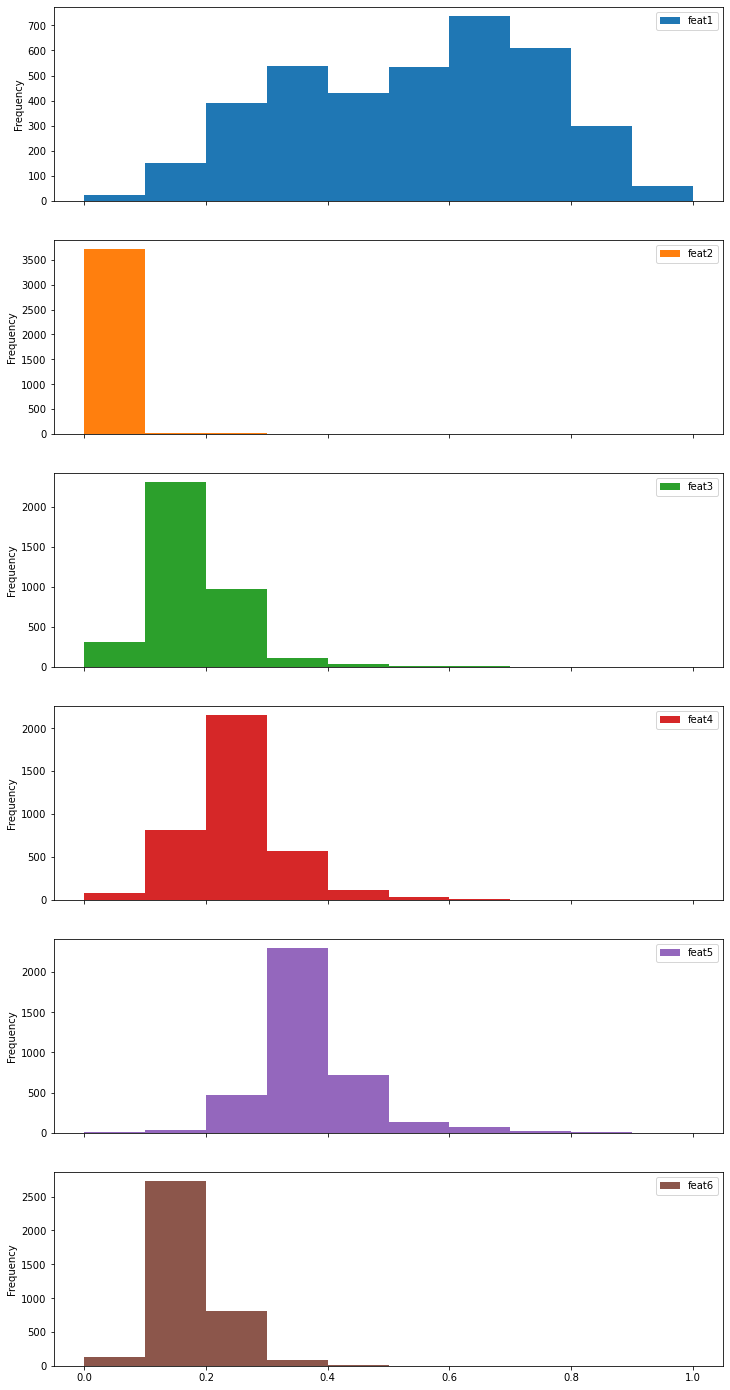

In [8]:
train_df[features].plot.hist(subplots=True, figsize=(12, 25))
plt.show()

## Create normal distribution from this features matrix
We will gradually apply these functions to each feature :
- $x_1 => x_1$
- $x_2 => np.log(x_2)$
- $x_3 => x_3^{1/4}$
- $x_4 => x_4^{1/4}$
- $x_5 => np.log(x_5 + 1)$
- $x_6 => x_6^{1/3}$

Plot of feature 2 after applying log function

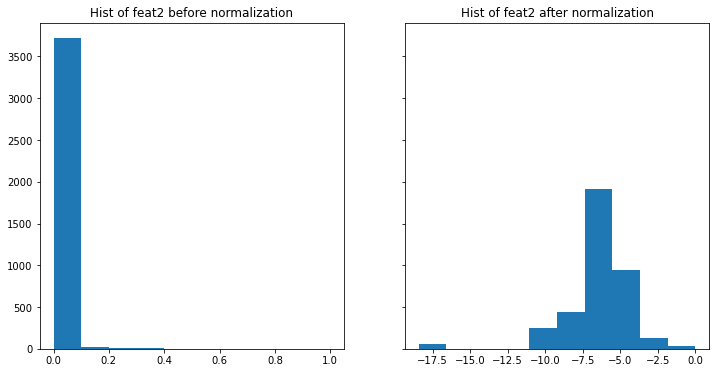

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
ax1.hist(train_df[features[1]].values)
ax1.set_title("Hist of "+features[1]+" before normalization")
ax2.hist(np.log(1e-8 + train_df[features[1]].values))
ax2.set_title("Hist of "+features[1]+" after normalization")
# plt.title('Histogram of feature: '+ features[1])
# plt.xlabel('Feature')
plt.show()

In [15]:
train_df[features[0]] = train_df[features[0]]
train_df[features[1]] = np.log(train_df[features[1]] + 1e-7)
train_df[features[2]] = train_df[features[2]] ** (1/3)
train_df[features[3]] = train_df[features[3]] ** (1/4)
train_df[features[4]] = np.log(1 + train_df[features[4]])
train_df[features[5]] = train_df[features[5]] ** (1/3)

## Apply PCA to visualize outlier and inlier

Principal component analysis (PCA).

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(train_df[features])

**explained_variance_** : **ndarray of shape (n_components,)** 

The amount of variance explained by each of the selected components. The variance estimation uses `n_samples` degrees of freedom.

Equal to n_components largest eigenvalues of the covariance matrix of X.

In [17]:
pca.explained_variance_

array([3.95285689, 0.04199122])

In [18]:
train_pca = pca.transform(train_df[features])
train_pca.shape, train_df.shape

((3772, 2), (3772, 7))

## Plot ~100 samples per class

In [20]:
data = train_df.groupby("label").sample(frac=0.8)
data.sample(10)

,feat1,feat2,feat3,feat4,feat5,feat6,label
311,0.860215,-7.882050,0.588662,0.743801,0.244510,0.651907,0.0
1863,0.129032,-5.279606,0.638995,0.708753,0.355736,0.543624,0.0
683,0.591398,-7.658959,0.569812,0.659569,0.277063,0.536125,0.0
176,0.505376,-8.574932,0.575597,0.723079,0.291197,0.595781,0.0
1785,0.462366,-5.174247,0.504078,0.696979,0.280615,0.575055,0.0
39,0.397849,-4.206008,0.760722,0.729181,0.041385,0.898858,0.0
1586,0.365591,-6.303282,0.606377,0.655459,0.233419,0.559781,0.0
210,0.258065,-4.683631,0.575597,0.640431,0.294700,0.503796,0.0
1987,0.666667,-16.118096,0.575597,0.735134,0.294700,0.606368,0.0
2047,0.634409,-5.802840,0.577500,0.712012,0.315462,0.568368,0.0


In [21]:
import seaborn as sns

For good visualization, we will use only a subset of the data

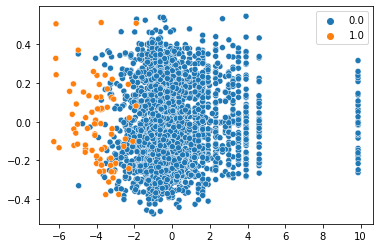

In [22]:
sns.scatterplot(x=train_pca[data.index][:, 0], y=train_pca[data.index][:, 1], hue=data.label.values)
plt.show()

Outlier are left aligned features in this visualization

## Split dataset into training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_df.groupby("label").sample(4)

,feat1,feat2,feat3,feat4,feat5,feat6,label
1775,0.580645,-5.356565,0.559900,0.707107,0.335801,0.550922,0.0
1720,0.387097,-5.141458,0.577500,0.667565,0.233419,0.570054,0.0
1714,0.247312,-6.459143,0.588662,0.651271,0.251836,0.541769,0.0
2151,0.612903,-7.619747,0.631154,0.724619,0.410149,0.534217,0.0
1209,0.365591,-2.838888,0.623113,0.566242,0.322288,0.416269,1.0
3075,0.741935,-1.818529,0.349508,0.491614,0.266329,0.366379,1.0
3006,0.344086,-3.941699,0.569812,0.626650,0.372049,0.453783,1.0
2937,0.290323,-1.638148,0.577500,0.619404,0.375280,0.445678,1.0


In [25]:
train_df.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,label
count,3772.000000,3.772000e+03,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,0.543121,-6.259120e+00,0.562237,0.698270,0.317930,0.555497,0.024655
std,0.203790,1.987708e+00,0.074936,0.062767,0.061670,0.060938,0.155093
min,0.000000,-1.611810e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,-6.783614e+00,0.538949,0.671458,0.284155,0.530360,0.000000
50%,0.569892,-5.802840e+00,0.575597,0.701251,0.318880,0.558031,0.000000
75%,0.709677,-5.397386e+00,0.597651,0.729181,0.345818,0.581590,0.000000
max,1.000000,1.000000e-07,1.000000,1.000000,0.693147,1.000000,1.000000


Split dataset into training and testing sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df["label"], stratify=train_df["label"], random_state=0, test_size=0.2)

X_train.shape, X_test.shape

((3017, 6), (755, 6))

In [27]:
y_train.value_counts()

0.0    2943
1.0      74
Name: label, dtype: int64

In [28]:
y_test.value_counts()

0.0    736
1.0     19
Name: label, dtype: int64

## Density estimation method
We will first apply :
- Dentity on the all features
- Dentity on the selected features
- Dentity on PCA features

In [29]:
from typing import Tuple


def compute_mu_std(X_train: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    mu = np.mean(X_train, axis=0)
    cov = np.cov(X_train, rowvar=0)
    return mu, cov

def multivariate_gaussian(X: np.ndarray, mu: np.ndarray, cov: np.ndarray):
    """
        Computes the probability 
        density function of the examples X under the multivariate gaussian 
        distribution with parameters mu and var. If var is a matrix, it is
        treated as the covariance matrix. If var is a vector, it is treated
        as the var values of the variances in each dimension (a diagonal
        covariance matrix
    """
    
    k = len(mu)
    
    if cov.ndim == 1:
        cov = np.diag(cov)
        
    X = X - mu
    p = (2 * np.pi)**(-k/2) * np.linalg.det(cov)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(cov)) * X, axis=1))
    
    return p

In [30]:
mu, var = compute_mu_std(X_train.values)

mu.shape, var.shape

((6,), (6, 6))

In [32]:
np.set_printoptions(3)
print(var)

[[ 4.241e-02 -2.324e-02 -3.897e-03 -2.260e-04 -2.201e-03  9.244e-04]
 [-2.324e-02  4.029e+00 -3.860e-02 -5.094e-02  5.590e-03 -5.601e-02]
 [-3.897e-03 -3.860e-02  5.642e-03  2.383e-03  1.780e-03  1.445e-03]
 [-2.260e-04 -5.094e-02  2.383e-03  3.851e-03  1.338e-03  3.171e-03]
 [-2.201e-03  5.590e-03  1.780e-03  1.338e-03  3.798e-03 -7.102e-04]
 [ 9.244e-04 -5.601e-02  1.445e-03  3.171e-03 -7.102e-04  3.684e-03]]


In [33]:
print(mu)

[ 0.542 -6.257  0.563  0.699  0.318  0.556]


In [34]:
density = multivariate_gaussian(X_test.values, mu, var)
density.shape

(755,)

In [35]:
train_density = multivariate_gaussian(X_train.values, mu, var)
train_density.shape

(3017,)

## Threshold selection criteria

In [36]:
from sklearn.metrics import f1_score

def compute_score(y_val, y_pred):
    """
        Compute f1_score
        tp = np.mean(preds & (y_val==1))
        fp = np.mean(preds & (y_val==0))
        tn = np.mean(~preds & (y_val==0))
        fn = np.mean(~preds & (y_val==1))
        
        prec = tp / (tp + fp + 1e-10)
        rec = tp / (tp + fn + 1e-10)
        F1 = 2 * prec * rec / (prec + rec + 1e-10)
    """
    return f1_score(y_val, y_pred)

In [37]:
def select_threshold(y_val, p_val): 
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        y_val (ndarray): Ground truth on validation set
        p_val (ndarray): Results on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 

    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    
    step_size = (max(p_val) - min(p_val)) / 1000

    accs = 0
    
    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        preds = p_val < epsilon
        
        F1 = compute_score(y_val, preds)

        acc = np.mean(preds == y_val)
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
            accs = acc
        
    return best_epsilon, best_F1, accs

In [38]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: 20.84409798139144
The optimal f1_score is: 0.27450980392156865
The accuracy is: 0.91415313225058


We will use the computed value of epsilon to determine anomaly in test set

In [39]:
test_score = compute_score(y_test.values, density < epsilon)

test_score

0.3488372093023256

## Using SKLEARN Implementation

In [44]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.2)

In [45]:
kde.fit(X_train)

probs = kde.score_samples(X_train)

epsilon, score, accuracy = select_threshold(y_train.values, probs)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: -1.4659726131768802
The optimal f1_score is: 0.6321243523316061
The accuracy is: 0.9764666887636725


In [47]:
density = kde.score_samples(X_test)

test_score = compute_score(y_test.values, density < epsilon)

test_score

0.7111111111111111

## Select features before estimation

In [48]:
y_train.head()

2597    0.0
3761    0.0
2649    0.0
3257    0.0
629     0.0
Name: label, dtype: float64

In [49]:
X_train.head()

,feat1,feat2,feat3,feat4,feat5,feat6
2597,0.204301,-6.629476,0.606377,0.713625,0.431721,0.512265
3761,0.268817,-8.797943,0.538949,0.796198,0.397610,0.612256
2649,0.763441,-7.189035,0.491311,0.675284,0.329067,0.522472
3257,0.763441,-4.586468,0.448361,0.642643,0.259109,0.528410
629,0.946237,-6.378179,0.606377,0.700404,0.305135,0.561519


In [50]:
data = X_train.copy()
data["Label"] = y_train

data.describe()

,feat1,feat2,feat3,feat4,feat5,feat6,Label
count,3017.000000,3.017000e+03,3017.000000,3017.000000,3017.000000,3017.000000,3017.000000
mean,0.542458,-6.256775e+00,0.562929,0.698744,0.318358,0.555741,0.024528
std,0.205946,2.007333e+00,0.075114,0.062057,0.061627,0.060693,0.154706
min,0.000000,-1.611810e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.376344,-6.783614e+00,0.538949,0.671458,0.284155,0.530360,0.000000
50%,0.569892,-5.802840e+00,0.575597,0.702097,0.318880,0.558031,0.000000
75%,0.709677,-5.397386e+00,0.597651,0.727670,0.345818,0.581590,0.000000
max,1.000000,1.000000e-07,1.000000,1.000000,0.693147,1.000000,1.000000


In [51]:
data.corr().abs().style.background_gradient("Blues")

,feat1,feat2,feat3,feat4,feat5,feat6,Label
feat1,1.000000,0.056208,0.251900,0.017682,0.173384,0.073955,0.010205
feat2,0.056208,1.000000,0.255986,0.408896,0.045185,0.459733,0.318085
feat3,0.251900,0.255986,1.000000,0.511330,0.384605,0.316995,0.287277
feat4,0.017682,0.408896,0.511330,1.000000,0.349734,0.842037,0.520554
feat5,0.173384,0.045185,0.384605,0.349734,1.000000,0.189874,0.048133
feat6,0.073955,0.459733,0.316995,0.842037,0.189874,1.000000,0.541157
Label,0.010205,0.318085,0.287277,0.520554,0.048133,0.541157,1.000000


features 6 and 4 are highly correlated, keeps 6 due to it better correlation with Label

Very low correlation between features 1, 5 and Label. We will remove it 

In [52]:
X_train_selected = X_train.drop(columns=[features[0], features[3], features[4]])
X_test_selected = X_test.drop(columns=[features[0], features[3], features[4]])


X_train_selected.shape, X_test_selected.shape

((3017, 3), (755, 3))

In [53]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train_selected)

train_density = kde.score_samples(X_train_selected)
test_density = kde.score_samples(X_test_selected)

In [54]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: -2.8977831334598374
The optimal f1_score is: 0.7088607594936708
The accuracy is: 0.9847530659595625


In [55]:
test_score = compute_score(y_test.values, test_density < epsilon)

print("F1-score when selecting features:", test_score)

F1-score when selecting features: 0.7500000000000001


Some improvements from 71 to 75

## Compare Features selections with PCA 3 components

In [57]:
pca = PCA(n_components=3)

X_train_selected = pca.fit_transform(X_train)
X_test_selected = pca.transform(X_test)


X_train_selected.shape, X_test_selected.shape

((3017, 3), (755, 3))

In [58]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X_train_selected)

train_density = kde.score_samples(X_train_selected)
test_density = kde.score_samples(X_test_selected)

In [59]:
epsilon, score, accuracy = select_threshold(y_train.values, train_density)

print("The optimal  threshold is:", epsilon)
print("The optimal f1_score is:", score)
print("The accuracy is:", accuracy)

The optimal  threshold is: -3.6740931080245396
The optimal f1_score is: 0.689655172413793
The accuracy is: 0.9850845210473981


In [60]:
test_score = compute_score(y_test.values, test_density < epsilon)

print("F1-score when selecting features:", test_score)

F1-score when selecting features: 0.6842105263157895


No improvement, poor score

## LOF implementation of sklearn

In [61]:
from sklearn.neighbors import LocalOutlierFactor

In [62]:
def fit_find_predict(model, X_train, y_train, X_test, y_test):
    """
    Fit a model to the data and return the predictions
    """
    model.fit(X_train.values)
    train_density = model.predict(X_train.values)
    test_density = model.predict(X_test.values)

    epsilon, score, accuracy = select_threshold(y_train.values, train_density)

    print("The optimal  threshold is:", epsilon)
    print("The optimal f1_score is:", score)
    print("The accuracy is:", accuracy)

    test_score = compute_score(y_test.values, test_density < epsilon)
    print("F1-score when selecting features:", test_score)

In [63]:
fit_find_predict(
    LocalOutlierFactor(novelty=True, n_neighbors=25),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.04444444444444445
The accuracy is: 0.9287371561153464
F1-score when selecting features: 0.10169491525423728


In [64]:
from sklearn.svm import OneClassSVM

In [65]:
fit_find_predict(
    OneClassSVM(),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.09349336702463677
The accuracy is: 0.5243619489559165
F1-score when selecting features: 0.09069212410501193


In [66]:
from sklearn.ensemble import IsolationForest

In [67]:
fit_find_predict(
    IsolationForest(random_state=41),
    X_train, y_train, X_test, y_test
)

The optimal  threshold is: -0.998
The optimal f1_score is: 0.3231850117096019
The accuracy is: 0.9042094796155121
F1-score when selecting features: 0.36538461538461536


## Classification approach

Try different classification approach such as :
- Logistic regression
- XGBoost classification

In [68]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [69]:
logistic: LogisticRegression = LogisticRegression().fit(X_train, y_train)

In [70]:
preds = logistic.predict(X_test)

compute_score(y_test.values, preds)

0.7272727272727273

In [71]:
xgb = XGBClassifier().fit(X_train, y_train)

In [72]:
preds = xgb.predict(X_test)

compute_score(y_test.values, preds)

0.9230769230769231

XGBoost is all you need, bye :-)